# Introduction

Here I'm testing a DQN on cartpole, with and without prioritised experience replay.


### Train -- without PER

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (1, 9.0)
(episode, score) = (2, 10.0)
(episode, score) = (3, 16.0)
(episode, score) = (4, 11.0)
(episode, score) = (5, 11.0)
(episode, score) = (6, 10.0)
(episode, score) = (7, 13.0)
(episode, score) = (8, 9.0)
(episode, score) = (9, 10.0)
(episode, score) = (10, 11.0)
(episode, score) = (11, 13.0)
(episode, score) = (12, 16.0)
(episode, score) = (13, 17.0)
(episode, score) = (14, 16.0)
(episode, score) = (15, 22.0)
(episode, score) = (16, 14.0)
(episode, score) = (17, 19.0)
(episode, score) = (18, 14.0)
(episode, score) = (19, 29.0)
(episode, score) = (20, 92.0)
(episode, score) = (21, 15.0)
(episode, score) = (22, 11.0)
(episode, score) = (23, 13.0)
(episode, score) = (24, 13.0)
(episode, score) = (25, 16.0)
(episode, score) = (26, 17.0)
(episode, score) = (27, 15.0)
(episode, score) = (28, 10.0)
(episode, score) = (29, 16.0)
(episode, score) = (30, 16.0)
(episode, sco

(episode, score) = (259, 200.0)
(episode, score) = (260, 200.0)
(episode, score) = (261, 200.0)
(episode, score) = (262, 200.0)
(episode, score) = (263, 200.0)
(episode, score) = (264, 200.0)
(episode, score) = (265, 200.0)
(episode, score) = (266, 200.0)
(episode, score) = (267, 200.0)
(episode, score) = (268, 200.0)
(episode, score) = (269, 200.0)
(episode, score) = (270, 200.0)
(episode, score) = (271, 200.0)
(episode, score) = (272, 200.0)
(episode, score) = (273, 200.0)
(episode, score) = (274, 200.0)
(episode, score) = (275, 200.0)
(episode, score) = (276, 200.0)
(episode, score) = (277, 200.0)
(episode, score) = (278, 200.0)
(episode, score) = (279, 200.0)
(episode, score) = (280, 200.0)
(episode, score) = (281, 200.0)
(episode, score) = (282, 200.0)
(episode, score) = (283, 200.0)
(episode, score) = (284, 200.0)
(episode, score) = (285, 200.0)
(episode, score) = (286, 200.0)
(episode, score) = (287, 200.0)
(episode, score) = (288, 200.0)
(episode, score) = (289, 200.0)
(episode

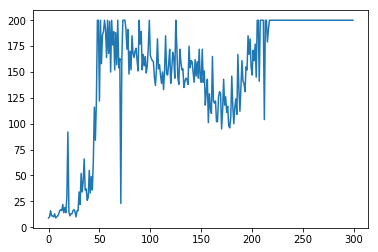

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#from agent_vanilla import Agent
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
lr,gamma = 0.001, 0.99
agent = Agent(num_states, num_actions, lr, gamma)
agent.epsilon = 0.5
agent.tau = 0.1
decay_factor = 0.99
epsilon_min = 0.01
learning_start = 500


#Train
EPISODES = 300
scores = []
step = 0
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        # env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if agent.buffer.num_memories > learning_start:
            agent.replay()                       #update the behavior model
            agent.soft_update_target_network()   #update the target model

        #iterate
        step += 1
        if done:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    if e % 1 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
np.savetxt('stats/scores_cartpole.txt',scores)

### Train with PER

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (1, 22.0)
(episode, score) = (2, 28.0)
(episode, score) = (3, 50.0)
(episode, score) = (4, 12.0)
(episode, score) = (5, 16.0)
(episode, score) = (6, 11.0)
(episode, score) = (7, 9.0)
(episode, score) = (8, 8.0)
(episode, score) = (9, 11.0)
(episode, score) = (10, 16.0)
(episode, score) = (11, 17.0)
(episode, score) = (12, 9.0)
(episode, score) = (13, 12.0)
(episode, score) = (14, 15.0)
(episode, score) = (15, 12.0)
(episode, score) = (16, 8.0)
(episode, score) = (17, 20.0)
(episode, score) = (18, 11.0)
(episode, score) = (19, 11.0)
(episode, score) = (20, 44.0)
(episode, score) = (21, 31.0)
(episode, score) = (22, 32.0)
(episode, score) = (23, 18.0)
(episode, score) = (24, 28.0)
(episode, score) = (25, 39.0)
(episode, score) = (26, 39.0)
(episode, score) = (27, 54.0)
(episode, score) = (28, 9.0)
(episode, score) = (29, 57.0)
(episode, score) = (30, 79.0)
(episode, score)

(episode, score) = (259, 122.0)
(episode, score) = (260, 126.0)
(episode, score) = (261, 116.0)
(episode, score) = (262, 119.0)
(episode, score) = (263, 135.0)
(episode, score) = (264, 132.0)
(episode, score) = (265, 128.0)
(episode, score) = (266, 153.0)
(episode, score) = (267, 134.0)
(episode, score) = (268, 128.0)
(episode, score) = (269, 122.0)
(episode, score) = (270, 142.0)
(episode, score) = (271, 126.0)
(episode, score) = (272, 122.0)
(episode, score) = (273, 122.0)
(episode, score) = (274, 133.0)
(episode, score) = (275, 137.0)
(episode, score) = (276, 130.0)
(episode, score) = (277, 136.0)
(episode, score) = (278, 127.0)
(episode, score) = (279, 128.0)
(episode, score) = (280, 123.0)
(episode, score) = (281, 122.0)
(episode, score) = (282, 133.0)
(episode, score) = (283, 140.0)
(episode, score) = (284, 136.0)
(episode, score) = (285, 122.0)
(episode, score) = (286, 119.0)
(episode, score) = (287, 119.0)
(episode, score) = (288, 140.0)
(episode, score) = (289, 142.0)
(episode

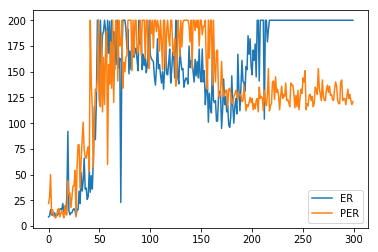

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#from agent_vanilla import Agent
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
lr,gamma = 0.001, 0.99
agent = Agent(num_states, num_actions, lr, gamma)
agent.epsilon = 0.5
agent.tau = 0.1
decay_factor = 0.99
epsilon_min = 0.01
learning_start = 500


#Train
EPISODES = 300
scores1 = []
step = 0
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        # env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if agent.buffer.num_memories > learning_start:
            agent.replay(prioritised = True)           #update the behavior model
            agent.soft_update_target_network()         #update the target model

        #iterate
        step += 1
        if done:
            break
    
    #Learn & print results
    scores1.append(reward_sum)
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    if e % 1 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
plt.plot(scores1)
plt.legend(['ER', 'PER'])

Huh... 